In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
# warnings.filterwarnings('ignore')

In [2]:
db_books= pd.read_csv(r"C:\Users\Abhinav\Desktop\Project_Book Recommendation\Books.csv",encoding='latin1',on_bad_lines='skip')
db_ratings = pd.read_csv(r"C:\Users\Abhinav\Desktop\Project_Book Recommendation\Ratings.csv")
db_users = pd.read_csv(r"C:\Users\Abhinav\Desktop\Project_Book Recommendation\Users.csv", encoding='latin1',on_bad_lines='skip')

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_14164\4171103667.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  db_books= pd.read_csv(r"C:\Users\Abhinav\Desktop\Project_Book Recommendation\Books.csv",encoding='latin1',on_bad_lines='skip')


In [135]:
db_books.head(20)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [4]:
db_books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [5]:
db_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
db_books = db_books.fillna(value="Not Available")

In [7]:
db_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [8]:
db_ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [9]:
db_ratings["Book-Rating"].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

In [10]:
db_ratings["Book-Rating"] = db_ratings["Book-Rating"].astype(int)

In [11]:
(db_ratings["Book-Rating"]==0).sum()

716109

(array([716109.,   1770.,   2759.,   5996.,   8904.,  50974.,  36924.,
         76457., 103736., 146151.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

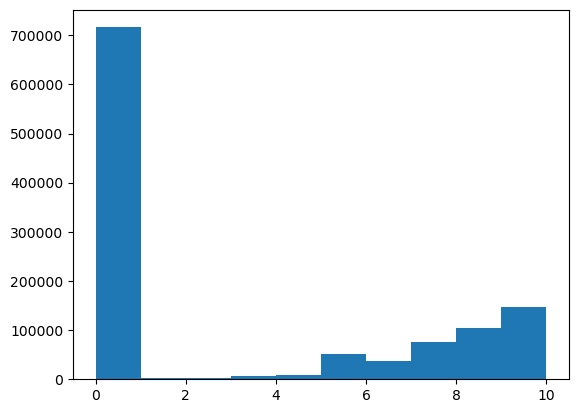

In [12]:
plt.hist(db_ratings["Book-Rating"])

In [13]:
db_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [14]:
db_ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [15]:
db_ratings["User-ID"].duplicated().sum()

1044497

In [16]:
## We will revome rows with 0 as ratings as these ratings are not present and will impact the recommendation system. 

In [17]:
db_ratings_filtered = db_ratings.drop(db_ratings[db_ratings["Book-Rating"]==0].index)

(array([  1770.,   2759.,   5996.,   8904.,  50974.,  36924.,  76457.,
        103736.,  67541.,  78610.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

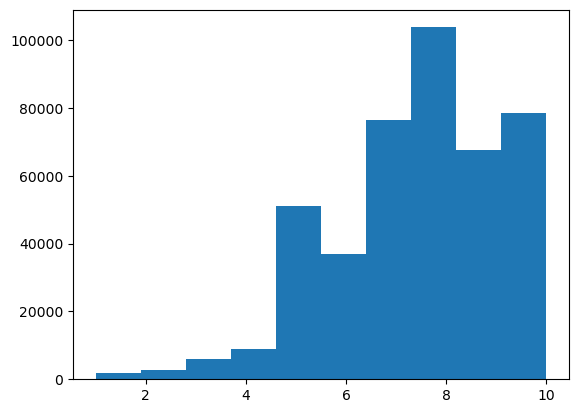

In [18]:
plt.hist(db_ratings_filtered["Book-Rating"])

In [19]:
db_users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [20]:
db_users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [21]:
db_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [22]:
db_users["Age"].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

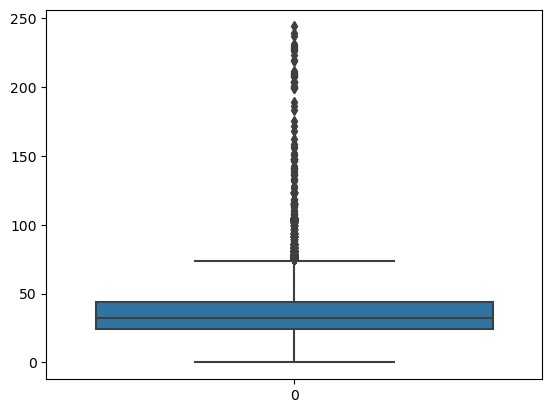

In [23]:
sns.boxplot(db_users["Age"])
plt.show()


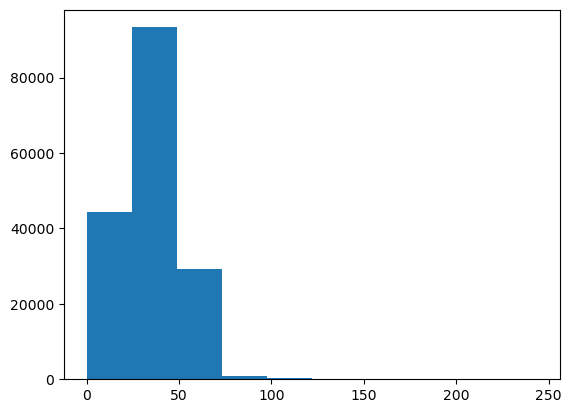

In [24]:
plt.hist(db_users["Age"])
plt.show()

In [25]:
## Calculating number of outliers in Age column

Q1 = db_users["Age"].quantile(0.25)
Q3 = db_users["Age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = db_users[(db_users["Age"] < lower_bound) | (db_users["Age"] > upper_bound)]
num_outliers = outliers.shape[0]
print(f"Number of outliers: {num_outliers}")
print("Outliers:")
print(outliers)

Number of outliers: 1084
Outliers:
        User-ID                                      Location    Age
220         221                      palm beach, florida, usa   79.0
689         690                      lake oswego, oregon, usa   80.0
957         958                           lindale, texas, usa   78.0
1147       1148                  prairie village, kansas, usa   79.0
1288       1289                     san jose, california, usa  103.0
...         ...                                           ...    ...
278301   278302      düsseldorf, nordrhein-westfalen, germany  104.0
278317   278318                  studio city, california, usa   77.0
278348   278349                           carlin, nevada, usa   76.0
278412   278413                    kansas city, missouri, usa   76.0
278471   278472  biel-benken bl/schweiz, alabama, switzerland   81.0

[1084 rows x 3 columns]


In [26]:
## Box plot shows age outliers are greater than 75 but we can drop rows with age greater than 100. 
db_users_filtered = db_users.drop(db_users[db_users["Age"]>100].index)
db_users_filtered

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [27]:
db_users_filtered

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [28]:
## replacing all null values in age with mean 34. 
db_users_filtered["Age"] = db_users_filtered["Age"].fillna(value="34")

In [29]:
db_users_filtered["Age"] = db_users_filtered["Age"].astype(int)

In [30]:
db_users_filtered.dtypes

User-ID      int64
Location    object
Age          int32
dtype: object

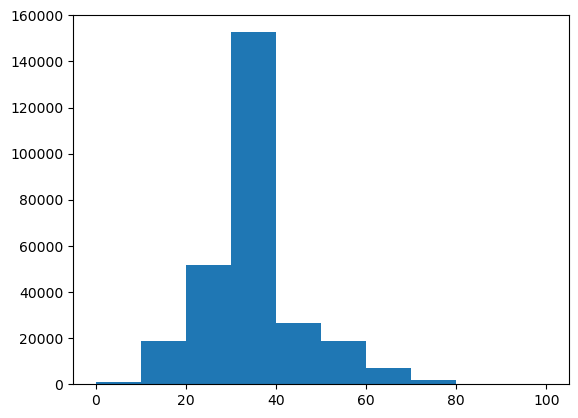

In [31]:
plt.hist(db_users_filtered["Age"])
plt.show()

# Book Recommendations 

### 1. Book Recommendation based on popularity 

In [32]:
## We try to find top 200 Books based on average ratings by users. 

In [33]:
db_books_rating = db_ratings_filtered.merge(db_books, on="ISBN")

In [34]:
db_books_rating 

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...,...,...,...,...
383837,276688,0425156737,2,Graven Images,Jane Waterhouse,1997,Berkley Publishing Group,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...
383838,276688,0671563149,6,MUDDY WATER (Peter Bartholomew Mysteries),Sally Gunning,1997,Pocket,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...
383839,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
383840,276704,0380796155,5,White Abacus,Damien Broderick,1998,Eos,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...


In [35]:
db_rating_count = db_books_rating.groupby("Book-Title").count()["Book-Rating"].reset_index()
db_rating_count.rename(columns={'Book-Rating':'Rating-Count'},inplace=True)
db_rating_count

,Book-Title,Rating-Count
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
135563,Ã?Â?rger mit Produkt X. Roman.,3
135564,Ã?Â?sterlich leben.,1
135565,Ã?Â?stlich der Berge.,1


In [36]:
db_ratings_avg = db_books_rating.groupby("Book-Title").mean()["Book-Rating"].reset_index()
db_ratings_avg.rename(columns={'Book-Rating':'Average-Rating'},inplace=True)
db_ratings_avg

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_14164\1716643052.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  db_ratings_avg = db_books_rating.groupby("Book-Title").mean()["Book-Rating"].reset_index()


,Book-Title,Average-Rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,7.000000
135564,Ã?Â?sterlich leben.,7.000000
135565,Ã?Â?stlich der Berge.,8.000000


In [37]:
db_popular = db_rating_count.merge(db_ratings_avg, on="Book-Title")
db_popular

,Book-Title,Rating-Count,Average-Rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
135564,Ã?Â?sterlich leben.,1,7.000000
135565,Ã?Â?stlich der Berge.,1,8.000000


In [38]:
db_popular.describe()

,Rating-Count,Average-Rating
count,135567.000000,135567.000000
mean,2.831382,7.522773
std,9.135691,1.706055
min,1.000000,1.000000
25%,1.000000,6.500000
50%,1.000000,8.000000
75%,2.000000,9.000000
max,707.000000,10.000000


In [39]:
top_50 = db_popular[db_popular["Rating-Count"]>50].sort_values("Average-Rating", ascending=False).head(50)
top_50

,Book-Title,Rating-Count,Average-Rating
119061,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882
115128,"The Return of the King (The Lord of the Rings,...",103,9.213592
45381,Harry Potter and the Goblet of Fire (Book 4),247,9.125506
109837,The Little Prince,90,9.111111
18993,Charlotte's Web (Trophy Newbery),68,9.073529
45400,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500
925,84 Charing Cross Road,61,9.049180
45385,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393
45393,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321
123681,To Kill a Mockingbird,267,8.977528


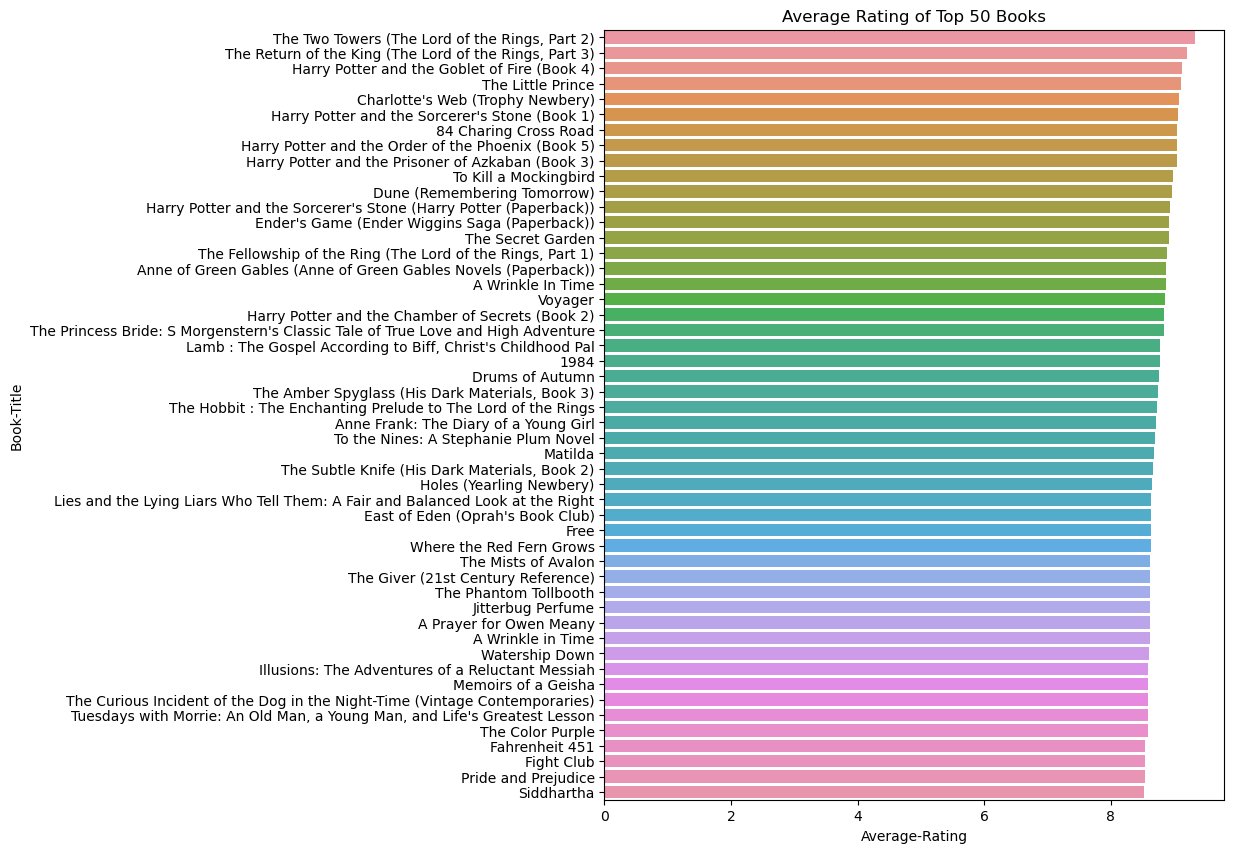

In [40]:
plt.figure(figsize=(8, 10))
sns.barplot(x=top_50["Average-Rating"], y=top_50["Book-Title"])
plt.title('Average Rating of Top 50 Books')
plt.show()

#  Recommendation System based on Collaberative Filtering

In [41]:
## We will create a table showing list of user id's and their respective Rating Count (Number of times a user has rated)

In [42]:
db_books_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...,...,...,...,...
383837,276688,0425156737,2,Graven Images,Jane Waterhouse,1997,Berkley Publishing Group,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...
383838,276688,0671563149,6,MUDDY WATER (Peter Bartholomew Mysteries),Sally Gunning,1997,Pocket,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...
383839,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
383840,276704,0380796155,5,White Abacus,Damien Broderick,1998,Eos,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...


In [43]:
a = db_books_rating.groupby("Book-Title").count()["Book-Rating"].reset_index()
a.rename(columns={'Book-Rating':'Rating-Count'},inplace=True)
a= a.sort_values("Rating-Count", ascending=False)

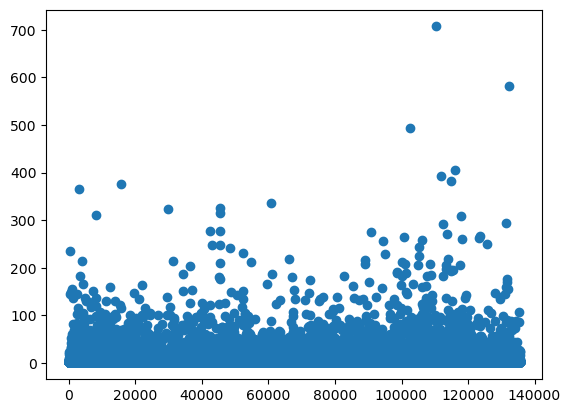

In [44]:
plt.scatter(x=a.index, y=a["Rating-Count"])

In [45]:
a[a["Rating-Count"]>1]

,Book-Title,Rating-Count
110229,The Lovely Bones: A Novel,707
132241,Wild Animus,581
102703,The Da Vinci Code,494
116196,The Secret Life of Bees,406
111950,The Nanny Diaries: A Novel,393
...,...,...
6356,All Fall Down (Mira),2
85785,Sacred Texts of the World: A Universal Anthology,2
6069,Alex: The Life Of A Child,2
68526,Mommy Made and Daddy Too: Home Cooking for a H...,2


In [46]:
a

,Book-Title,Rating-Count
110229,The Lovely Bones: A Novel,707
132241,Wild Animus,581
102703,The Da Vinci Code,494
116196,The Secret Life of Bees,406
111950,The Nanny Diaries: A Novel,393
...,...,...
54565,Journeys with Elijah: Eight Tales of the Prophet,1
54564,Journeys to Door County,1
54562,Journeys of Simplicity: Traveling Light With T...,1
54561,Journeys into Past Lives,1


In [47]:
## We can see from above scatter plot that most of the users who have rated book are between 0-1000
## We also observe further at 90% of books that have been rated are between 1-10. 
## Let us consider all userid's above 10 for our system. IE 6k User id's 

In [48]:
indexes = a.index
indexes

Int64Index([110229, 132241, 102703, 116196, 111950, 114960,  15761,   3064,
             60688,  45374,
            ...
             54577,  54573,  54572,  54569,  54566,  54565,  54564,  54562,
             54561, 135566],
           dtype='int64', length=135567)

In [49]:
db_high_rated_users = db_books_rating[db_books_rating.index.isin(indexes)]
db_high_rated_users

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...,...,...,...,...
135562,245410,044173118X,8,Robot Adept (Apprentice Adept (Paperback)),Piers Anthony,1989,Ace Books,http://images.amazon.com/images/P/044173118X.0...,http://images.amazon.com/images/P/044173118X.0...,http://images.amazon.com/images/P/044173118X.0...
135563,257204,044173118X,10,Robot Adept (Apprentice Adept (Paperback)),Piers Anthony,1989,Ace Books,http://images.amazon.com/images/P/044173118X.0...,http://images.amazon.com/images/P/044173118X.0...,http://images.amazon.com/images/P/044173118X.0...
135564,261603,044173118X,8,Robot Adept (Apprentice Adept (Paperback)),Piers Anthony,1989,Ace Books,http://images.amazon.com/images/P/044173118X.0...,http://images.amazon.com/images/P/044173118X.0...,http://images.amazon.com/images/P/044173118X.0...
135565,11676,0441865038,5,Virtual Mode (Mode (Paperback)),Piers Anthony,1991,Ace Books,http://images.amazon.com/images/P/0441865038.0...,http://images.amazon.com/images/P/0441865038.0...,http://images.amazon.com/images/P/0441865038.0...


In [50]:
b = db_high_rated_users.groupby("User-ID").count()["Book-Rating"].reset_index()
b.rename(columns={'Book-Rating':'Rating-Count'},inplace=True)
b= b.sort_values("Rating-Count", ascending=False)
b

,User-ID,Rating-Count
2719,11676,3501
14405,98391,458
1747,7346,314
3361,16795,280
22013,153662,260
...,...,...
22483,157473,1
22482,157472,1
22481,157467,1
22480,157456,1


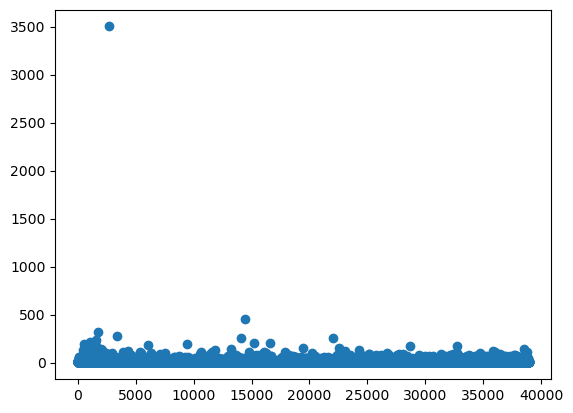

In [51]:
plt.scatter(x=b["User-ID"].index, y=b["Rating-Count"])

In [52]:
b

,User-ID,Rating-Count
2719,11676,3501
14405,98391,458
1747,7346,314
3361,16795,280
22013,153662,260
...,...,...
22483,157473,1
22482,157472,1
22481,157467,1
22480,157456,1


In [53]:
b[b["Rating-Count"]>1]

,User-ID,Rating-Count
2719,11676,3501
14405,98391,458
1747,7346,314
3361,16795,280
22013,153662,260
...,...,...
6596,39651,2
11332,74813,2
13364,90474,2
8215,51986,2


In [54]:
## In the above filtering we observe that out of 1.35L books there are around 47k books which have been rated more than
## just once. So we will use all books which have been rated more than onece. 

In [55]:
books_indexes = b[b["Rating-Count"]>1].index
#books_indexes = b.index

In [56]:
db_high_rated_books = db_books_rating[db_books_rating.index.isin(books_indexes)]
db_high_rated_books 

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
5,16877,038550120X,9,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
8,21340,038550120X,9,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
10,22625,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...,...,...,...,...
38919,275429,0380789035,9,American Gods,Neil Gaiman,2002,HarperTorch,http://images.amazon.com/images/P/0380789035.0...,http://images.amazon.com/images/P/0380789035.0...,http://images.amazon.com/images/P/0380789035.0...
38921,254,0380810492,7,He Could Be the One (Avon Light Contemporary R...,Elizabeth Bevarly,2001,Avon,http://images.amazon.com/images/P/0380810492.0...,http://images.amazon.com/images/P/0380810492.0...,http://images.amazon.com/images/P/0380810492.0...
38922,182086,0380810492,10,He Could Be the One (Avon Light Contemporary R...,Elizabeth Bevarly,2001,Avon,http://images.amazon.com/images/P/0380810492.0...,http://images.amazon.com/images/P/0380810492.0...,http://images.amazon.com/images/P/0380810492.0...
38925,98391,0380817845,8,Man at Work (Avon Light Contemporary Romances),Elaine Fox,2002,Avon,http://images.amazon.com/images/P/0380817845.0...,http://images.amazon.com/images/P/0380817845.0...,http://images.amazon.com/images/P/0380817845.0...


In [57]:
pt = db_high_rated_books.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")

In [58]:
pt.fillna(0, inplace=True)

In [59]:
pt

User-ID,8,17,19,22,26,32,39,53,56,67,...,278807,278818,278824,278825,278828,278832,278836,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
01-01-00: A Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-00: The Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100 Best-Loved Poems (Dover Thrift Editions),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Experiments in the Philosophy of Everyday Life,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year In Provence,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Your Finances in Changing Times (The Christian Financial Concepts Series),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Your Money or Your Life: Transforming Your Relationship With Money and Achieving Financial Independence,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.metrics.pairwise import cosine_similarity

In [128]:
pt.dtypes

User-ID
8         float64
17        float64
19        float64
22        float64
26        float64
           ...   
278832    float64
278836    float64
278843    float64
278851    float64
278854    float64
Length: 9357, dtype: object

In [61]:
s_score = cosine_similarity(pt)

In [124]:
sorted(list(enumerate(s_score[0])), key=lambda x:x[1], reverse=True)[1:6]

[(115, 0.6467616667635546),
 (138, 0.6467616667635546),
 (245, 0.6467616667635546),
 (385, 0.6467616667635546),
 (431, 0.6467616667635546)]

In [123]:
pt.to_csv('pt.csv', index=True)

In [129]:
pt.to_pickle("pt.pkl")

### Below is function which recommends 5 books when a user enters a book. 

In [63]:
def recommend(book_name):
    try:
        ind = np.where(pt.index==book_name)[0][0]
        similar_books = sorted(list(enumerate(s_score[ind])), key=lambda x:x[1], reverse=True)[1:6]
        for i in similar_books:
            print(pt.index[i[0]])
    except IndexError:
        print("No Recommendations found for this book")


In [136]:
recommend("The Kitchen God's Wife")

The Conspiracy Club
Anna Karenina
Bachelor Brothers' Bed &amp; Breakfast Pillow Book
Christmas Bonus, Strings Attached
Disney's Pocahontas (Disney's Wonderful World of Reading)


In [65]:
## We go ahead and try with some other models. 

# Recommendation using Google tensorflow

In [66]:
pip install -q tensorflow-recommenders


Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install -q --upgrade tensorflow-datasets

Note: you may need to restart the kernel to use updated packages.


In [68]:
import os
import pprint
import tempfile

from typing import Dict, Text

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [69]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.1


In [134]:
import sys
print(sys.version)

3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]


In [70]:
import tensorflow_recommenders as tfrs

In [71]:
## First we have to convert pandas dataframe to a tensorflow dataset. For that we will take only numerical features.

In [72]:
## From ratings dataset we will take user-id's and ISBN

In [73]:
## From Books database we will take only ISBN

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
df = db_books_rating[["User-ID", "ISBN", "Book-Rating"]]

In [101]:
df.head(25)

,User-ID,ISBN,Book-Rating,user,item
0,276726,0155061224,5,0,0
1,276729,052165615X,3,1,1
2,276729,0521795028,6,1,2
3,276744,038550120X,7,2,3
4,11676,038550120X,10,3,3
5,16877,038550120X,9,4,3
6,17975,038550120X,6,5,3
7,20806,038550120X,6,6,3
8,21340,038550120X,9,7,3
9,21356,038550120X,7,8,3


In [78]:
user_ids = df['User-ID'].unique().tolist()
item_ids = df['ISBN'].unique().tolist()

In [79]:
user_to_index = {user: idx for idx, user in enumerate(user_ids)}
item_to_index = {item: idx for idx, item in enumerate(item_ids)}

In [80]:
df['user'] = df['User-ID'].map(user_to_index)
df['item'] = df['ISBN'].map(item_to_index)

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_14164\1376235887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['User-ID'].map(user_to_index)
C:\Users\Abhinav\AppData\Local\Temp\ipykernel_14164\1376235887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item'] = df['ISBN'].map(item_to_index)


In [81]:
# Split data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [82]:
# Create TensorFlow Dataset objects
def df_to_tensor(df):
    return tf.data.Dataset.from_tensor_slices((
        (df['user'].values, df['item'].values),
        df['Book-Rating'].values
    )).shuffle(1000).batch(256)

In [83]:
train_data = df_to_tensor(train_df)
test_data = df_to_tensor(test_df)

In [84]:
# Building the Model
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_items, embedding_size=50):
        super(RecommenderNet, self).__init__()
        self.user_embedding = tf.keras.layers.Embedding(num_users, embedding_size)
        self.item_embedding = tf.keras.layers.Embedding(num_items, embedding_size)
        self.dot = tf.keras.layers.Dot(axes=1)
        
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[0])
        item_vector = self.item_embedding(inputs[1])
        return self.dot([user_vector, item_vector])

In [85]:
num_users = len(user_ids)
num_items = len(item_ids)
model = RecommenderNet(num_users, num_items)

In [86]:
#  Compiling the Model
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1), loss='mse')

In [87]:
# Train the Model
history = model.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
1200/1200 [==============================] - 2s 1ms/step - loss: 61.5509 - val_loss: 61.5817
Epoch 2/10
1200/1200 [==============================] - 1s 1ms/step - loss: 61.5235 - val_loss: 61.5813
Epoch 3/10
1200/1200 [==============================] - 1s 1ms/step - loss: 61.4763 - val_loss: 61.5773
Epoch 4/10
1200/1200 [==============================] - 1s 1ms/step - loss: 61.3104 - val_loss: 61.5484
Epoch 5/10
1200/1200 [==============================] - 1s 1ms/step - loss: 60.5965 - val_loss: 61.3966
Epoch 6/10
1200/1200 [==============================] - 1s 1ms/step - loss: 59.1360 - val_loss: 61.0005
Epoch 7/10
1200/1200 [==============================] - 1s 1ms/step - loss: 58.0914 - val_loss: 60.3512
Epoch 8/10
1200/1200 [==============================] - 1s 1ms/step - loss: 56.6978 - val_loss: 59.2101
Epoch 9/10
1200/1200 [==============================] - 1s 1ms/step - loss: 54.4572 - val_loss: 57.4775
Epoch 10/10
1200/1200 [==============================] - 1s 1ms/

In [88]:
df["ISBN"].str.contains(r'[a-zA-Z]').sum()

31644

In [ ]:
# df.drop(df.loc[df["ISBN"].str.contains(r'[a-zA-Z]')].index, inplace=True)

In [100]:
df.to_csv('df_for_tf.csv', index=False)
db_books.to_csv('df_books.csv', index=False)

In [90]:
#  Make Predictions
# For a specific user, get recommendations
user_index = user_to_index[16877]  # For example, user_id = 1
item_indices = np.array(list(item_to_index.values()))

user_item_pairs = np.array([[user_index, item] for item in item_indices])
predicted_ratings = model.predict([user_item_pairs[:, 0], user_item_pairs[:, 1]])

recommended_items = {item_ids[item]: predicted_ratings[idx][0] for idx, item in enumerate(item_indices)}
recommended_items = sorted(recommended_items.items(), key=lambda x: x[1], reverse=True)

top_5_recommended_items = recommended_items[:5]

print("Top 5 recommended items for user:")
for item, rating in top_5_recommended_items:
    print(f"Item {item}: {rating}")

4683/4683 [==============================] - 3s 621us/step
Top 5 recommended items for user:
Item 0385504209: 1.5941119194030762
Item 0316666343: 1.464723825454712
Item 0316601950: 1.4456332921981812
Item 0142001740: 1.387028694152832
Item 0060928336: 1.3727651834487915


In [91]:
top_5_recommended_items[1][0]

'0316666343'

In [92]:
for item, rating in top_5_recommended_items:
    print(item)

0385504209
0316666343
0316601950
0142001740
0060928336


In [93]:
db_books["Book-Title"][db_books["ISBN"]==top_5_recommended_items[0][0]]

748    The Da Vinci Code
Name: Book-Title, dtype: object

In [94]:
Recommended_books = db_books["Book-Title"][db_books["ISBN"]==top_5_recommended_items[0][0]]
Recommended_books

748    The Da Vinci Code
Name: Book-Title, dtype: object

In [95]:
def recomm_books (recommended_items):
    for item in recommended_items:
    #    print(db_books["Book-Title"][db_books["ISBN"]==item[0]])
        print(db_books.loc[db_books['ISBN'] == item[0], 'Book-Title'].values[0]) 

In [96]:
# recomm_books(top_5_recommended_items)

In [97]:
def book_recommendation(userid):
    user_index = user_to_index[userid]  # For a specific user id.
    item_indices = np.array(list(item_to_index.values()))

    user_item_pairs = np.array([[user_index, item] for item in item_indices])
    predicted_ratings = model.predict([user_item_pairs[:, 0], user_item_pairs[:, 1]])

    recommended_items = {item_ids[item]: predicted_ratings[idx][0] for idx, item in enumerate(item_indices)}
    recommended_items = sorted(recommended_items.items(), key=lambda x: x[1], reverse=True)

    top_5_recommended_items = recommended_items[:5]

    print("Top 5 recommended books for this user:")
    for item in top_5_recommended_items:
        print(db_books.loc[db_books['ISBN'] == item[0], 'Book-Title'].values[0]) 

In [107]:
np.array([[12, item] for item in np.array(list(item_to_index.values()))])

array([[    12,      0],
       [    12,      1],
       [    12,      2],
       ...,
       [    12, 149833],
       [    12, 149834],
       [    12, 149835]])

In [102]:
book_recommendation(31315)

4683/4683 [==============================] - 3s 668us/step
Top 5 recommended books for this user:
Divine Secrets of the Ya-Ya Sisterhood: A Novel
The Da Vinci Code
To Kill a Mockingbird
The Pilot's Wife : A Novel
Harry Potter and the Order of the Phoenix (Book 5)


In [112]:
model.save('book_recommendation_model', save_format="tf")

INFO:tensorflow:Assets written to: book_recommendation_model\assets


INFO:tensorflow:Assets written to: book_recommendation_model\assets


# Deploying the Model 